In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("data/cellprofiler_results.pkl", "rb") as in_file:
    cp_results = pickle.load(in_file)
    
with open("data/EfficientNet_results.pkl", "rb") as in_file:
    en_results = pickle.load(in_file)

# Enrichment Analysis

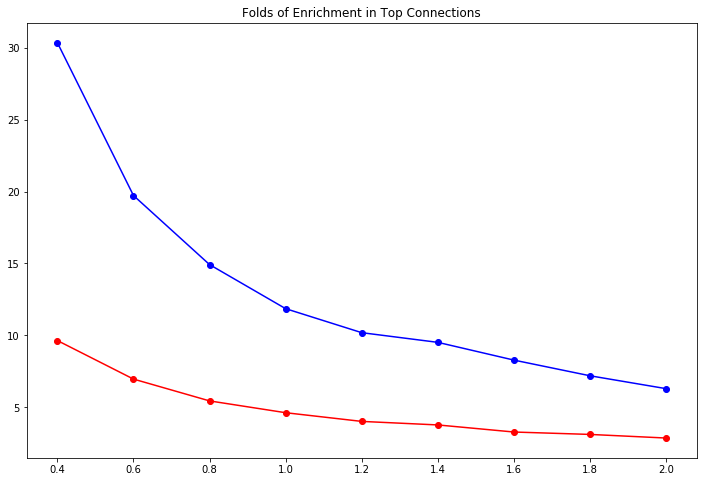

In [3]:
plt.figure(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100-cp_results["enrichment"]["percentile"], cp_results["enrichment"]["ods_ratio"], marker="o", color="red")
plt.plot(100-en_results["enrichment"]["percentile"], en_results["enrichment"]["ods_ratio"], marker="o", color="blue")

# Average Precision

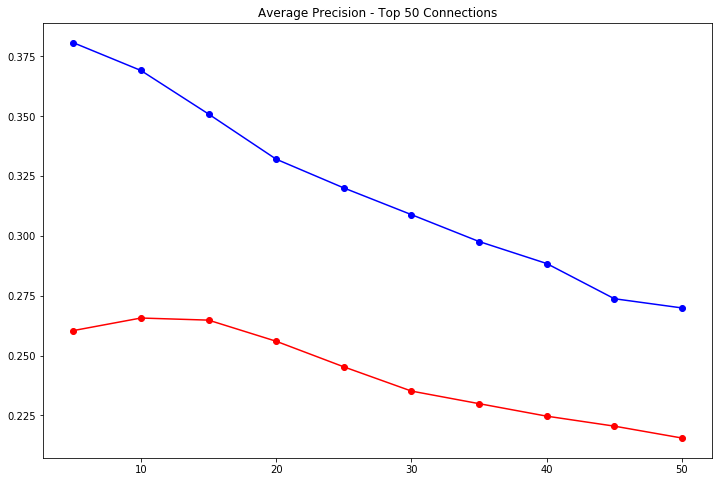

In [4]:
plt.figure(figsize=(12,8))
plt.title("Average Precision - Top 50 Connections")
plt.plot(cp_results["ranking"], cp_results["avg_precision"], marker="o", color="red")
plt.plot(en_results["ranking"], en_results["avg_precision"], marker="o", color="blue")

# Recall at top connections

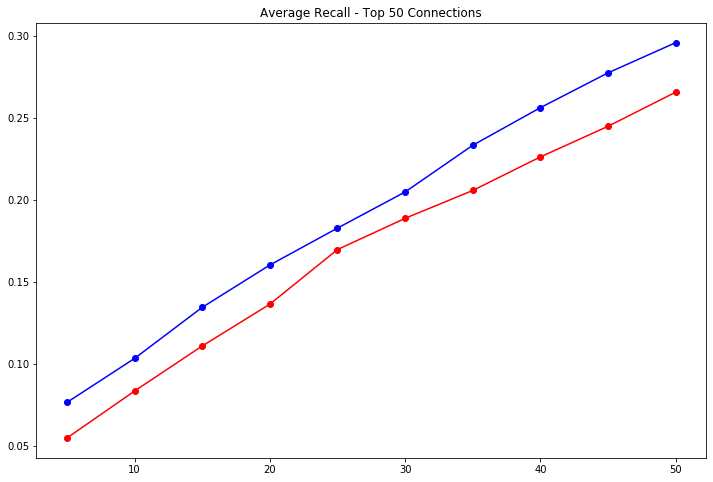

In [5]:
plt.figure(figsize=(12,8))
plt.title("Average Recall - Top 50 Connections")
plt.plot(cp_results["ranking"], cp_results["recall"], marker="o", color="red")
plt.plot(en_results["ranking"], en_results["recall"], marker="o", color="blue")